In [2]:
import numpy as np
import scipy.signal as sps
import scipy.ndimage as spn
import matplotlib.pyplot as plt

In [7]:
def gen_acf(period, cadence):
    lags = np.arange(0, 27, cadence)
    acf = np.sin(2 * np.pi * lags / period) * np.exp(-0.1*lags) + np.random.normal(scale=0.01, size=lags.shape) 
    
    return lags, acf

In [12]:
24/60/30

0.013333333333333334

<IPython.core.display.Javascript object>


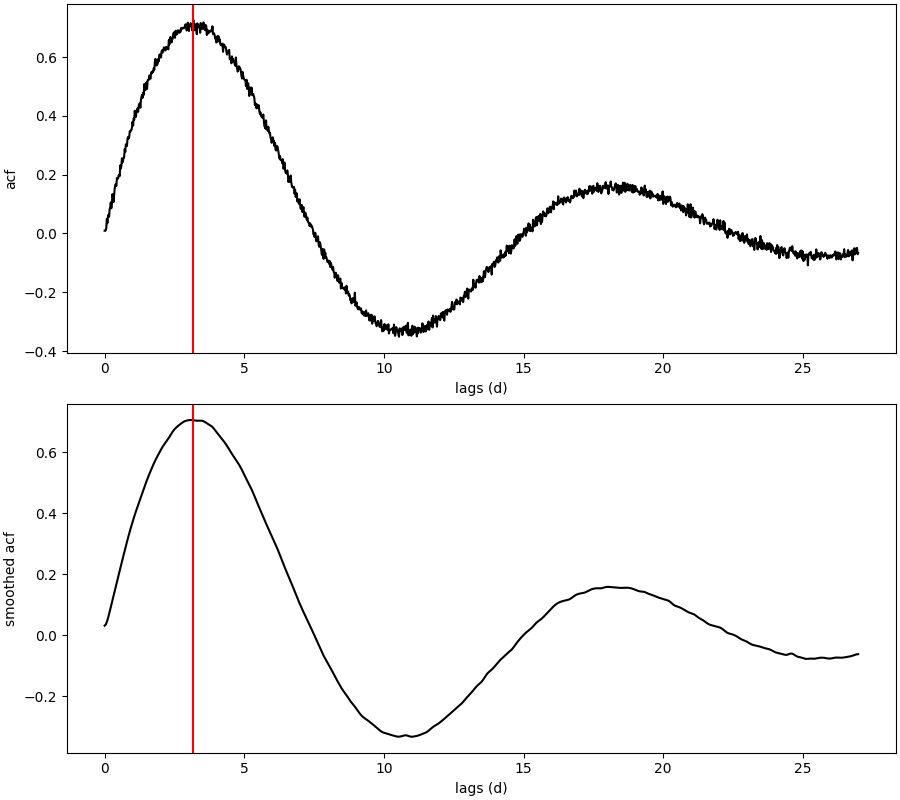

In [12]:
p = 15
cadence = 0.02 # 0.013 # 0.02
lags, acf = gen_acf(p, cadence)

# acf_smooth = sps.savgol_filter(acf, 41, 3)
acf_smooth = spn.gaussian_filter(acf, sigma=5)#, polyorder)

%matplotlib notebook
fig, ax = plt.subplots(2, 1, constrained_layout=True)

ax[0].plot(lags, acf, 'k-')
ax[0].axvline(lags[np.argmax(acf)], c='r')
ax[0].set(xlabel='lags (d)', ylabel='acf')

ax[1].plot(lags, acf_smooth, 'k-')
ax[1].axvline(lags[np.argmax(acf)], c='r')
ax[1].set(xlabel='lags (d)', ylabel='smoothed acf')

fig.set_size_inches(9,8)